<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/YB0321(1)_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [7]:
chipo=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep="\t")

### Step 4. See the first 10 entries

In [8]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64 



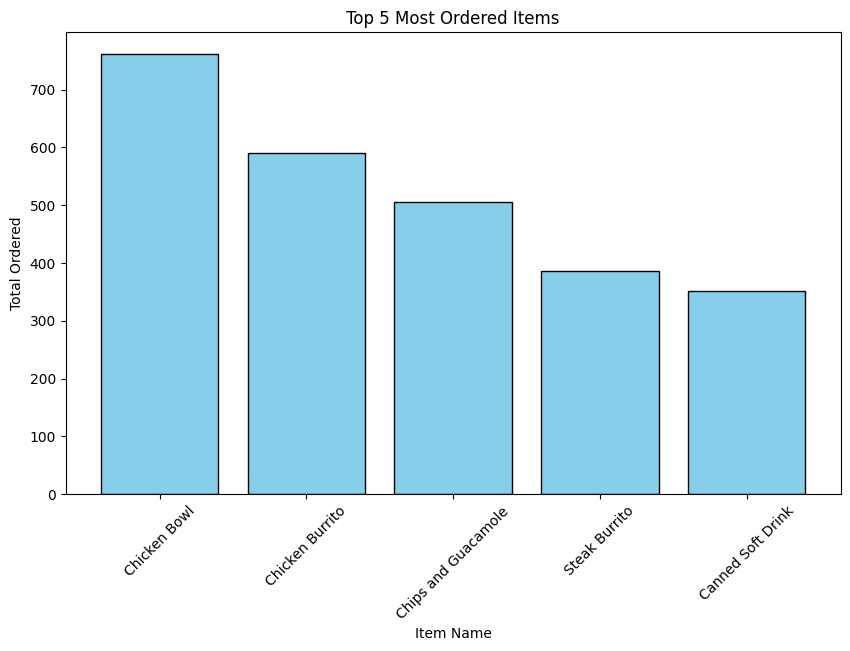

In [20]:
top5_items = chipo.groupby("item_name")["quantity"].sum().nlargest(5)
print(top5_items,'\n')

plt.figure(figsize=(10, 6))
plt.bar(top5_items.index, top5_items.values, color="skyblue", edgecolor="black")
plt.xlabel("Item Name")
plt.ylabel("Total Ordered")
plt.title("Top 5 Most Ordered Items")
plt.xticks(rotation=45)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

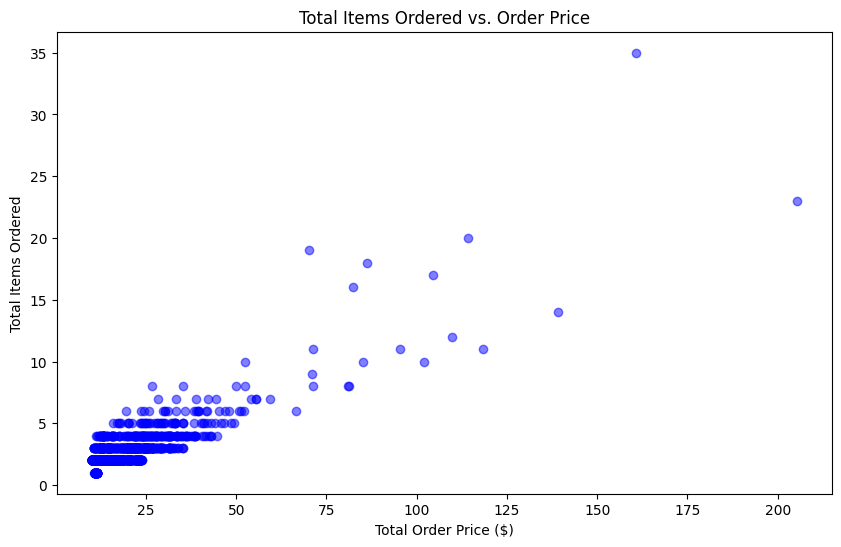

In [25]:
chipo["item_price"] = chipo["item_price"].str.replace("$", "", regex=False).astype(float)

order_summary = chipo.groupby("order_id").agg("sum")

plt.figure(figsize=(10, 6))
plt.scatter(order_summary["item_price"], order_summary["quantity"], color="blue", alpha=0.5)
plt.xlabel("Total Order Price ($)")  # X-axis: Order Price
plt.ylabel("Total Items Ordered")  # Y-axis: Items Ordered
plt.title("Total Items Ordered vs. Order Price")
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

What is the most popular item in the Chipo dataset, and how many times was it ordered?

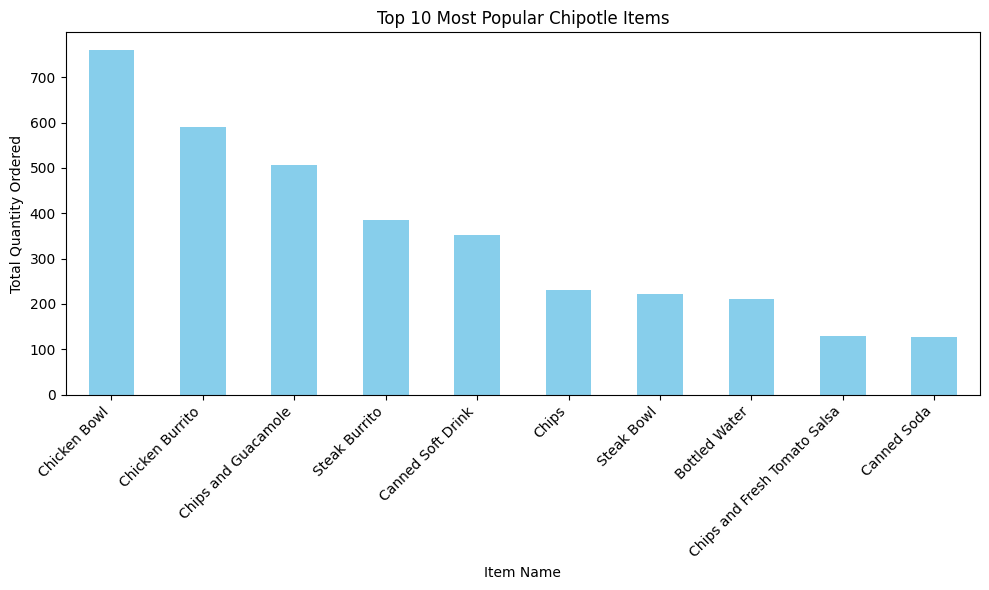

In [27]:
item_counts = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)

# Plot the top 10 most popular items
top10_items = item_counts.head(10)

plt.figure(figsize=(10,6))
top10_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Chipotle Items')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()